In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('big_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6807 non-null   int64  
 1   INJURY_BAD           6807 non-null   float64
 2   HELMET_USED          6807 non-null   float64
 3   age_bins             6807 non-null   object 
 4   SAFE_PEDAL_ACTION    6807 non-null   object 
 5   PROTECTIVE_CLOTHING  6807 non-null   float64
 6   SAFE_LOCATION        6807 non-null   float64
 7   WEATHER_CAT          6807 non-null   object 
 8   road_surf_bins       6807 non-null   object 
 9   DAYTIME              6807 non-null   int64  
 10  SPEED_RATING         6807 non-null   object 
 11  physical_bins        6807 non-null   object 
 12  hour_bins            6807 non-null   object 
 13  SEX                  6807 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 744.6+ KB


In [4]:
df = df.drop(['Unnamed: 0','road_surf_bins'],axis=1)

In [5]:
df = df.loc[df['SEX'] != 'X']

In [6]:
df = df.loc[df['physical_bins'] != 'Shaken']

In [7]:
df['SEX'].value_counts()

M    5202
F    1369
Name: SEX, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6571 entries, 0 to 6806
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INJURY_BAD           6571 non-null   float64
 1   HELMET_USED          6571 non-null   float64
 2   age_bins             6571 non-null   object 
 3   SAFE_PEDAL_ACTION    6571 non-null   object 
 4   PROTECTIVE_CLOTHING  6571 non-null   float64
 5   SAFE_LOCATION        6571 non-null   float64
 6   WEATHER_CAT          6571 non-null   object 
 7   DAYTIME              6571 non-null   int64  
 8   SPEED_RATING         6571 non-null   object 
 9   physical_bins        6571 non-null   object 
 10  hour_bins            6571 non-null   object 
 11  SEX                  6571 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 667.4+ KB


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [10]:
y = df['INJURY_BAD']
X = df.drop('INJURY_BAD',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=312)

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
ohe = OneHotEncoder()
X_train_encoded = ohe.fit_transform(X_train)
X_test_encoded = ohe.transform(X_test)

In [13]:
dt = DecisionTreeClassifier(max_depth=25,random_state=312)
dt.fit(X_train_encoded,y_train)

DecisionTreeClassifier(max_depth=25, random_state=312)

In [14]:
y_train_pred = dt.predict(X_train_encoded)
y_test_pred = dt.predict(X_test_encoded)

from sklearn.metrics import precision_score,recall_score

train_p = precision_score(y_train,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_train,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.9642857142857143
Test Precision: 0.05660377358490566
Train Recall: 0.27
Test Recall: 0.02127659574468085


In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#plt.figure(figsize=(16, 12))
#plot_tree(dt, filled=True)
#plt.show()

In [16]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(random_state=312)
X_u, y_u = under.fit_resample(X_train_encoded,y_train)

In [17]:
dt = DecisionTreeClassifier(max_depth=2,random_state=312)
dt.fit(X_u,y_u)

DecisionTreeClassifier(max_depth=2, random_state=312)

In [18]:
y_train_pred = dt.predict(X_u)
y_test_pred = dt.predict(X_test_encoded)

train_p = precision_score(y_u,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_u,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.5693430656934306
Test Precision: 0.1267605633802817
Train Recall: 0.624
Test Recall: 0.6382978723404256


In [19]:
#plt.figure(figsize=(16, 12))
#plot_tree(dt, filled=True)
#plt.show()

In [20]:
importances = list(dt.feature_importances_)

In [21]:
xu_df = pd.DataFrame(X_u.todense(),columns=ohe.get_feature_names())

In [22]:
names = list(xu_df.columns)

In [23]:
importance_names = dict(zip(names,importances))

In [24]:
importance_names

{'x0_0.0': 0.0,
 'x0_1.0': 0.0,
 'x1_Adolescent': 0.0,
 'x1_Adult': 0.26627482580170864,
 'x1_Elderly': 0.0,
 'x1_Middle-aged': 0.0,
 'x2_Neutral': 0.0,
 'x2_Safe': 0.0,
 'x2_Unsafe': 0.1721037505619861,
 'x3_0.0': 0.0,
 'x3_1.0': 0.0,
 'x4_0.0': 0.0,
 'x4_1.0': 0.0,
 'x5_Adverse Weather': 0.0,
 'x5_Clear Weather': 0.0,
 'x6_0': 0.0,
 'x6_1': 0.0,
 'x7_Above Average Speed': 0.0,
 'x7_Average Speed': 0.0,
 'x7_Below Average Speed': 0.0,
 'x8_Impaired': 0.0,
 'x8_Normal': 0.5616214236363053,
 'x8_Other': 0.0,
 'x9_Afternoon': 0.0,
 'x9_Early Morning': 0.0,
 'x9_Morning': 0.0,
 'x9_Night': 0.0,
 'x10_F': 0.0,
 'x10_M': 0.0}

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
X_train_df = pd.DataFrame(X_train_encoded.todense(),columns=ohe.get_feature_names())
X_test_df = pd.DataFrame(X_test_encoded.todense(),columns=ohe.get_feature_names())
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

In [27]:
log_model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=312)

In [28]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=312)

In [29]:
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)

train_p = precision_score(y_train,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_train,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')


Train Precision: 0.1276595744680851
Test Precision: 0.1417910447761194
Train Recall: 0.528
Test Recall: 0.5390070921985816


In [30]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200,max_depth=4,random_state=312)
clf.fit(X_u,y_u)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=312)

In [31]:
y_train_pred = clf.predict(X_u)
y_test_pred = clf.predict(X_test_encoded)

train_p = precision_score(y_u,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_u,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.6550218340611353
Test Precision: 0.14462081128747795
Train Recall: 0.6
Test Recall: 0.5815602836879432


In [32]:
importances = list(clf.feature_importances_)
names = list(xu_df.columns)
importance_names = dict(zip(names,importances))
importance_names

{'x0_0.0': 0.02220749732756342,
 'x0_1.0': 0.02062013282541608,
 'x1_Adolescent': 0.019800742034499032,
 'x1_Adult': 0.08341850158112486,
 'x1_Elderly': 0.060258069127731705,
 'x1_Middle-aged': 0.04233089338557669,
 'x2_Neutral': 0.019971704619236693,
 'x2_Safe': 0.028615526845391596,
 'x2_Unsafe': 0.0448899557743853,
 'x3_0.0': 0.013774653492211218,
 'x3_1.0': 0.016421028891985313,
 'x4_0.0': 0.052692725795297705,
 'x4_1.0': 0.052559962839064125,
 'x5_Adverse Weather': 0.013503626863651743,
 'x5_Clear Weather': 0.015311924849673713,
 'x6_0': 0.02045418577687068,
 'x6_1': 0.03640951612828036,
 'x7_Above Average Speed': 0.02767733921526963,
 'x7_Average Speed': 0.016603711200955634,
 'x7_Below Average Speed': 0.018826716554415025,
 'x8_Impaired': 0.025666035573416193,
 'x8_Normal': 0.11212790797943124,
 'x8_Other': 0.07372367810542944,
 'x9_Afternoon': 0.05909667481504094,
 'x9_Early Morning': 0.014150857363896246,
 'x9_Morning': 0.015216662548776443,
 'x9_Night': 0.03839145807976653,
 

In [33]:
from sklearn.ensemble import VotingClassifier

avg = VotingClassifier(estimators=[('dt',dt),('clf',clf)])
avg.fit(X_u,y_u)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=2,
                                                     random_state=312)),
                             ('clf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200,
                                                     random_state=312))])

In [34]:
y_train_pred = avg.predict(X_u)
y_test_pred = avg.predict(X_test_encoded)

train_p = precision_score(y_u,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_u,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.6521739130434783
Test Precision: 0.14853556485355648
Train Recall: 0.51
Test Recall: 0.5035460992907801


In [35]:
from sklearn.metrics import precision_recall_curve, auc

y_score = log_model.decision_function(X_test_scaled)
precision,recall,thresholds = precision_recall_curve(y_test,y_score)
print('AUC: {}'.format(auc(recall, precision)))

AUC: 0.13909001106469185


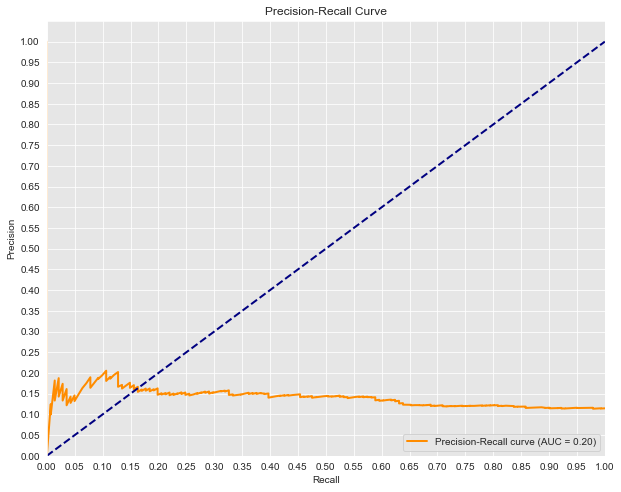

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot a Precision-Recall Curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-Recall curve (AUC = 0.20)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

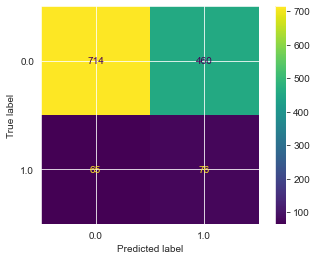

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_model,X_test_scaled,y_test);

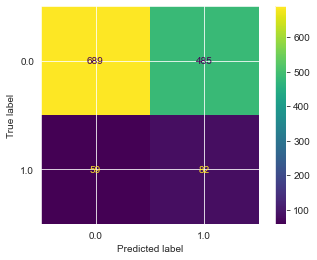

In [38]:
plot_confusion_matrix(clf,X_test_encoded,y_test);

In [39]:
coef_dict = {}
for coef, feat in zip(log_model.coef_[0,:],X_train_df.columns):
    coef_dict[feat] = coef
for i,v in coef_dict.items():
    coef_dict[i] = round(v,2)
coef_dict

{'x0_0.0': -0.04,
 'x0_1.0': 0.04,
 'x1_Adolescent': -0.09,
 'x1_Adult': -0.26,
 'x1_Elderly': 0.29,
 'x1_Middle-aged': 0.07,
 'x2_Neutral': 0.04,
 'x2_Safe': -0.18,
 'x2_Unsafe': 0.13,
 'x3_0.0': -0.01,
 'x3_1.0': 0.01,
 'x4_0.0': 0.12,
 'x4_1.0': -0.12,
 'x5_Adverse Weather': 0.11,
 'x5_Clear Weather': -0.11,
 'x6_0': -0.07,
 'x6_1': 0.07,
 'x7_Above Average Speed': 0.27,
 'x7_Average Speed': -0.08,
 'x7_Below Average Speed': -0.18,
 'x8_Impaired': 0.14,
 'x8_Normal': -0.37,
 'x8_Other': 0.23,
 'x9_Afternoon': -0.25,
 'x9_Early Morning': 0.23,
 'x9_Morning': -0.16,
 'x9_Night': 0.18,
 'x10_F': 0.08,
 'x10_M': -0.08}

In [40]:
import numpy as np
selected_five = np.array([-0.37,0.29,0.27,0.23,-0.18])
np.exp(selected_five)

array([0.69073433, 1.33642749, 1.30996445, 1.25860001, 0.83527021])

In [41]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100],
#    'penalty': ['l1', 'l2', 'elasticnet'],
#    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#}

#grid_search = GridSearchCV(log_model, param_grid, cv=5)
#grid_search.fit(X_train_scaled, y_train)
#
# Get the best hyperparameters and score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

# Train a new Logistic Regression model with the best hyperparameters
#logreg_best = LogisticRegression(random_state=312, **best_params)
#logreg_best.fit(X_train_scaled, y_train)

# Obtain predictions on the test set
#y_pred = logreg_best.predict(X_test_scaled)

In [42]:
# Generate a classification report for the predictions
#from sklearn.metrics import classification_report

#print(classification_report(y_test, y_pred))

In [43]:
#best_params

In [44]:
log_model = LogisticRegression(C=.001,class_weight='balanced',max_iter=1000,random_state=312)
log_model.fit(X_train_scaled,y_train)

y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)

train_p = precision_score(y_train,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_train,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.12460353420933394
Test Precision: 0.13611615245009073
Train Recall: 0.55
Test Recall: 0.5319148936170213
